In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Fetch the absolute path of the file
file_path = os.path.abspath('parkinsons.csv')

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.drop('name', axis=1, inplace=True)

In [5]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [8]:
df.nunique()

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

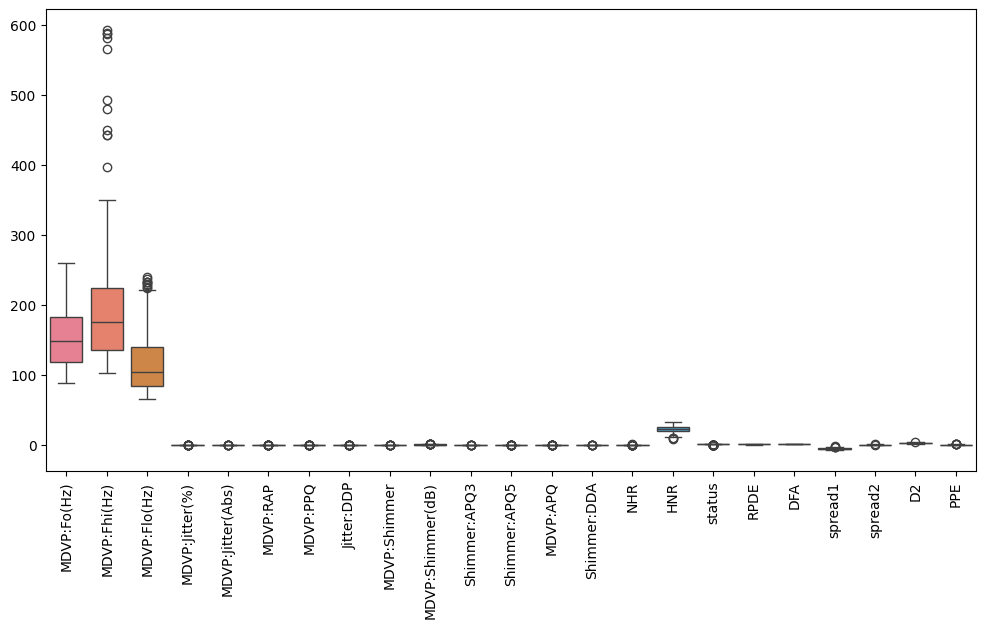

In [10]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Calculate the lower and upper bounds for winsorization
MDVP_hi_upper_bound = np.percentile(df['MDVP:Fhi(Hz)'], 99)  # 99th percentile
MDVP_lo_upper_bound = np.percentile(df['MDVP:Flo(Hz)'], 99)  # 99th percentile

# Apply winsorization
df['MDVP:Fhi(Hz)'] = np.where(df['MDVP:Fhi(Hz)'] > MDVP_hi_upper_bound, MDVP_hi_upper_bound, df['MDVP:Fhi(Hz)'])
df['MDVP:Flo(Hz)'] = np.where(df['MDVP:Flo(Hz)'] > MDVP_lo_upper_bound, MDVP_lo_upper_bound, df['MDVP:Flo(Hz)'])

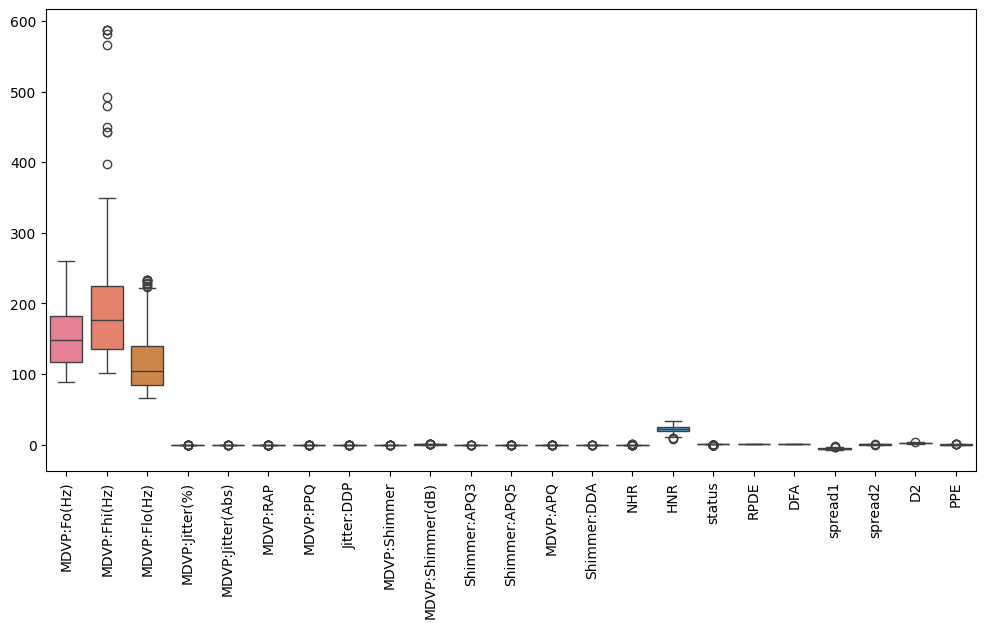

In [12]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Function to count outliers in each column
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
    return outliers_count

In [14]:
# Count the number of outliers in each column
outliers_count = count_outliers(df, df.columns)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Number of outliers in each column:
MDVP:Fo(Hz): 0
MDVP:Fhi(Hz): 11
MDVP:Flo(Hz): 9
MDVP:Jitter(%): 14
MDVP:Jitter(Abs): 7
MDVP:RAP: 14
MDVP:PPQ: 15
Jitter:DDP: 14
MDVP:Shimmer: 8
MDVP:Shimmer(dB): 10
Shimmer:APQ3: 6
Shimmer:APQ5: 13
MDVP:APQ: 12
Shimmer:DDA: 6
NHR: 19
HNR: 3
status: 48
RPDE: 0
DFA: 0
spread1: 4
spread2: 2
D2: 1
PPE: 5


In [15]:
# Count zero values in each column
zero_df = df.drop('status', axis=1)
zero_counts = (zero_df == 0).sum()

# Print the counts of zero values for all columns
print("Counts of zero values in each column:")
print(zero_counts)

Counts of zero values in each column:
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [16]:
X = df.drop('status', axis=1)
y = df['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print(X.shape, X_train_scaled.shape, X_test_scaled.shape)

(195, 22) (156, 22) (39, 22)


In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_train_precision = precision_score(y_train, lr_train_predictions, average='binary')
lr_train_recall = recall_score(y_train, lr_train_predictions, average='binary')

lr_test_predictions = lr_model.predict(X_test_scaled)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
lr_test_precision = precision_score(y_test, lr_test_predictions, average='binary')
lr_test_recall = recall_score(y_test, lr_test_predictions, average='binary')

In [22]:
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [23]:
svc_train_predictions = svc_model.predict(X_train_scaled)
svc_train_accuracy = accuracy_score(y_train, svc_train_predictions)
svc_train_precision = precision_score(y_train, svc_train_predictions, average='binary')
svc_train_recall = recall_score(y_train, svc_train_predictions, average='binary')

svc_test_predictions = svc_model.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_predictions)
svc_test_precision = precision_score(y_test, svc_test_predictions, average='binary')
svc_test_recall = recall_score(y_test, svc_test_predictions, average='binary')

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
rf_train_predictions = rf_model.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = rf_model.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [26]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
xgb_train_predictions = xgb_model.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = xgb_model.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [28]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.8717948717948718, Precision: 0.8861788617886179, Recall: 0.9478260869565217
SVC Accuracy: 0.9038461538461539, Precision: 0.8846153846153846, Recall: 1.0
RFC Accuracy: 1.0, Precision: 1.0, Recall: 1.0
XGB Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [29]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.8974358974358975, Precision: 0.8888888888888888, Recall: 1.0
SVC Accuracy: 0.8717948717948718, Precision: 0.9090909090909091, Recall: 0.9375
RFC Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0
XGB Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [32]:
# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters for XGBoost
best_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [33]:
rf_train_predictions = best_rf.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = best_rf.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [34]:
xgb_train_predictions = best_xgb.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = best_xgb.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [35]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.8717948717948718, Precision: 0.8861788617886179, Recall: 0.9478260869565217
SVC Accuracy: 0.9038461538461539, Precision: 0.8846153846153846, Recall: 1.0
RFC Accuracy: 1.0, Precision: 1.0, Recall: 1.0
XGB Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [36]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.8974358974358975, Precision: 0.8888888888888888, Recall: 1.0
SVC Accuracy: 0.8717948717948718, Precision: 0.9090909090909091, Recall: 0.9375
RFC Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0
XGB Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0


In [37]:
# Evaluate on training set
models = {
    'LR': lr_model,
    'SVC': svc_model,
    'RF': best_rf,
    'XGB': best_xgb
}

In [38]:
for name, model in models.items():
    train_predictions = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='binary')
    train_recall = recall_score(y_train, train_predictions, average='binary')
    
    print(f'Training set: {name} - Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}')

print()
# Evaluate on testing set
for name, model in models.items():
    test_predictions = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='binary')
    test_recall = recall_score(y_test, test_predictions, average='binary')
    print(f'Testing set: {name} - Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}')

Training set: LR - Accuracy: 0.8717948717948718, Precision: 0.8861788617886179, Recall: 0.9478260869565217
Training set: SVC - Accuracy: 0.9038461538461539, Precision: 0.8846153846153846, Recall: 1.0
Training set: RF - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Training set: XGB - Accuracy: 1.0, Precision: 1.0, Recall: 1.0

Testing set: LR - Accuracy: 0.8974358974358975, Precision: 0.8888888888888888, Recall: 1.0
Testing set: SVC - Accuracy: 0.8717948717948718, Precision: 0.9090909090909091, Recall: 0.9375
Testing set: RF - Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0
Testing set: XGB - Accuracy: 0.9487179487179487, Precision: 0.9411764705882353, Recall: 1.0


In [39]:
# Function to make predictions with all models
def predict_parkinsons(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_scaled = scaler.transform(input_data_reshaped)
    
    models = {
        'LR': lr_model,
        'SVC': svc_model,
        'RF': best_rf,
        'XGB': best_xgb
    }
    
    for name, model in models.items():
        prediction = model.predict(input_data_scaled)
        print(f'{name} Prediction: {"Patient has Parkinsons" if prediction[0] == 1 else "Patient does not have Parkinsons"}')

# Example input data
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
predict_parkinsons(input_data)

LR Prediction: Patient does not have Parkinsons
SVC Prediction: Patient does not have Parkinsons
RF Prediction: Patient does not have Parkinsons
XGB Prediction: Patient does not have Parkinsons


C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
import joblib

In [41]:
joblib.dump(svc_model, 'parkinsons.pkl')
joblib.dump(scaler, 'scaler_parkinsons.pkl')

['scaler_parkinsons.pkl']

In [42]:
# Fetch the absolute path of the file
ml_file_path = os.path.abspath('parkinsons.pkl')
scaler_file_path = os.path.abspath('scaler_parkinsons.pkl')

In [45]:
parkinsons_model = joblib.load(ml_file_path)
parkinsons_scaler = joblib.load(scaler_file_path)

In [46]:
# Function to make predictions with all models
def predict_parkinsons(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_scaled = parkinsons_scaler.transform(input_data_reshaped)

    prediction = parkinsons_model.predict(input_data_scaled)
    print(f'Prediction: {"Patient has Parkinsons" if prediction[0] == 1 else "Patient does not have Parkinsons"}')

# Example input data
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
predict_parkinsons(input_data)

Prediction: Patient does not have Parkinsons


C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
